<a href="https://colab.research.google.com/github/appletreeleaf/Project/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_GBT_%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 / 패키지 불러오기

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model



## 1. 데이터 불러오기

In [ ]:
crime = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/AI_start/기말프로젝트/crime (2021 in korea) 수정전.csv", encoding = 'CP949')
crime.tail(10)

,district,n_cctv,n_police,n_substation,n_streetlamp,n_emschool,n_119SC,n_bar,n_park,n_SC,n_underpass,population,n_crime_occurrence
56,오산시,3118,1,4,13589,24,1,224,110,157,2,238435,2019
57,용인시,13637,2,19,26665,104,1,327,0,618,18,1091955,4570
58,의왕시,2438,1,4,5461,13,1,19,77,92,1,163465,566
59,의정부시,4843,2,5,11301,33,1,424,107,340,3,468867,4294
60,이천시,4788,1,13,5783,31,1,181,33,250,5,229373,1356
61,파주시,4798,1,13,23188,57,1,251,157,392,5,496484,2252
62,평택시,10327,1,15,21888,60,1,1056,533,599,5,555899,3872
63,포천시,2301,1,14,10124,31,1,268,45,230,1,159862,1169
64,하남시,3397,1,5,4339,20,1,71,28,161,3,272634,965
65,화성시,13242,1,16,13589,93,2,413,0,742,8,826187,3557


### 데이터 시각화

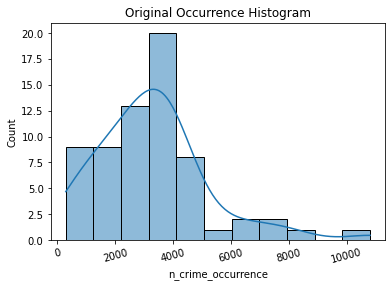

In [ ]:
# 범죄발생건 수( Y값 )의 분포
plt.title('Original Occurrence Histogram')
plt.xticks(rotation=15)
sns.histplot(crime['n_crime_occurrence'], kde=True)
plt.show()

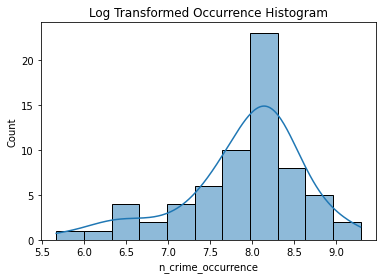

In [ ]:
# 범죄발생건 수( Y값 ) 로그 변환후의 분포
plt.title('Log Transformed Occurrence Histogram')
log_SalePrice = np.log1p(crime['n_crime_occurrence'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

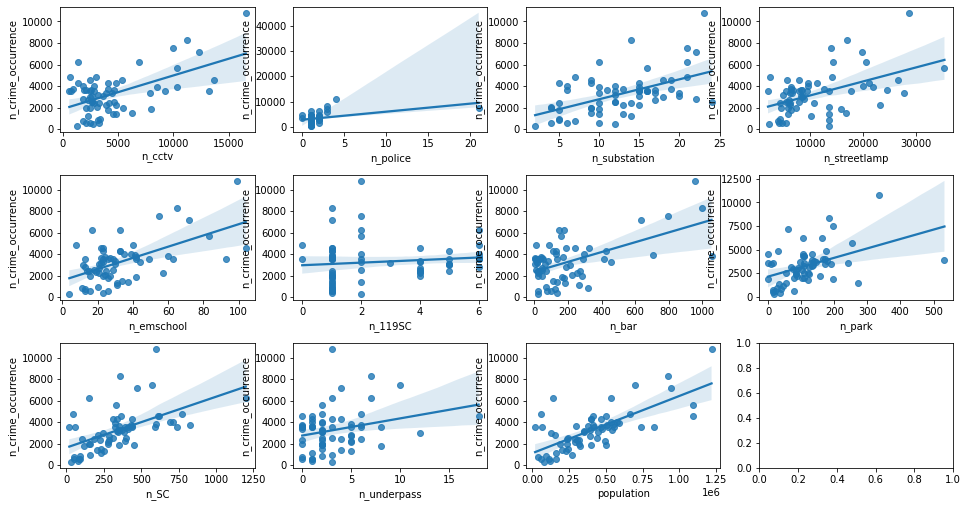

In [ ]:
# 3개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=3) #시각화를 위한 빈종이 생성
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
lm_features = ['n_cctv','n_police','n_substation','n_streetlamp','n_emschool','n_119SC','n_bar','n_park', 'n_SC', 'n_underpass', 'population'] #feature를 빈종이로 생성
for i , feature in enumerate(lm_features): #enumerate 인덱스와 인자를 차례로 반환
    row = int(i/4) # 0 0 0 0 1 1 1 1 2 2 2 2
    col = i%4 # 1 2 3 4 1 2 3 4 1 2 3 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='n_crime_occurrence',data=crime , ax=axs[row][col]) #row, col 순서에 따른 4*2 그림 출력

# 2. Preprocessing

In [ ]:
# #범죄발생건 수( Y값 ) 로그 변환 (y값의 분포를 정규분포에 근사)

# original_n_crime_occurrence = crime['n_crime_occurrence']

# Dataset에서 X, y 분리
y_target = np.log1p(crime['n_crime_occurrence'])

X_features = crime.drop('n_crime_occurrence', axis=1, inplace=False)
X_features = X_features.drop(['district'], axis=1, inplace=False)  #자치구 칼럼 drop

# 피처 스케일링 -> X들간에 scale 차이를 줄이기 위함
from sklearn.preprocessing import MinMaxScaler

# features 정규화
scaler = MinMaxScaler()
X_features_scaled = scaler.fit_transform(X_features)

## X(정규화) y(로그변환) 산점도

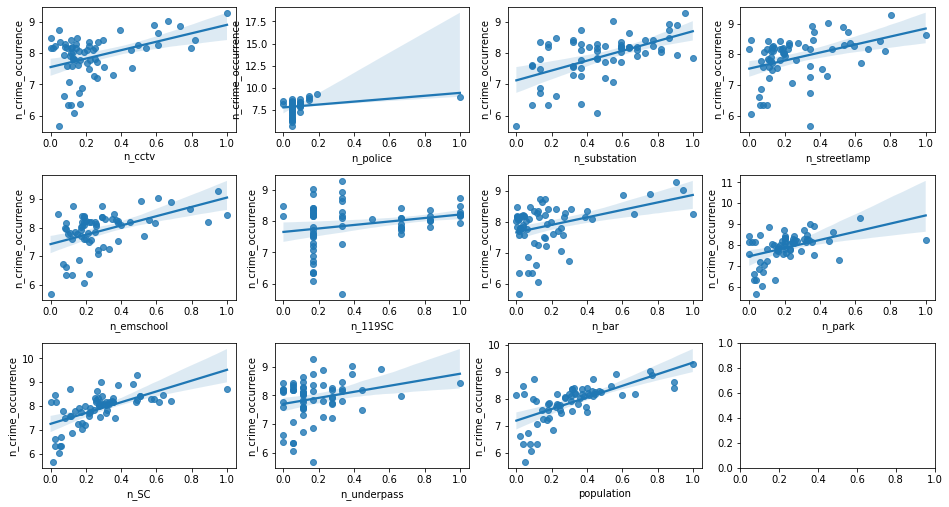

In [ ]:
# 3개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=3) #시각화를 위한 빈종이 생성
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
lm_features = ['n_cctv','n_police','n_substation','n_streetlamp','n_emschool','n_119SC','n_bar','n_park', 'n_SC', 'n_underpass', 'population'] #feature를 빈종이로 생성
X_scaled = pd.DataFrame(scaler.fit_transform(X_features), columns=lm_features)
y_log = np.log1p(crime['n_crime_occurrence'])
crime_scaled = pd.concat([X_scaled, y_log], axis = 1) # X, y 데이터프레임 열병='

for i , feature in enumerate(lm_features): #enumerate 인덱스와 인자를 차례로 반환
    row = int(i/4) # 0 0 0 0 1 1 1 1 2 2 2 2
    col = i%4 # 1 2 3 4 1 2 3 4 1 2 3 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='n_crime_occurrence',data=crime_scaled , ax=axs[row][col]) #row, col 순서에 따른 4*2 그림 출력

In [ ]:
# train / test 분리
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target, test_size=0.25, random_state=156)

# 3. 모델 생성

In [ ]:
# 모델 학습
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train, )

LinearRegression()

In [ ]:
# 예측 (log-scale)
y_pred = mlr.predict(X_test)
y_pred

array([7.23374783, 7.6387985 , 7.32518751, 8.38202477, 7.70995553,
       6.9638994 , 8.00944389, 7.34308112, 7.71044622, 7.89226837,
       7.81907192, 8.09825479, 7.37037804, 6.79966503, 8.52534001,
       8.05331322, 7.2496804 ])

## 실제 값( target )과 예측값( predict ) 사이의 관계 (산점도)

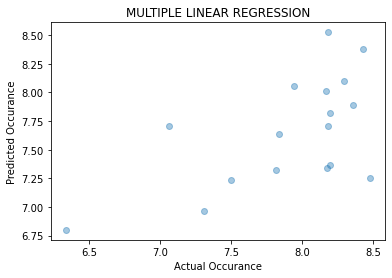

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Occurance")
plt.ylabel("Predicted Occurance")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
mlr.score(X_train, y_train) # R^2 (결정계수 / accuracy와 같은 역할)

0.6889519589890631

# 선형 회귀 모델의 학습/예측/평가
* RMSE 평가 함수 생성
타겟값을 로그 변환하여, 학습한 모델은 예측값도 원본 데이터에 로그 스케일로 예측함.
실제 타겟값도 로그값, 예측값도 로그값이므로 RMSE를 적용하면 자연스럽게 RMSLE로 적용됨.

In [ ]:
# 학습이 완료된 모델을 인자로 받아서 테스트 데이터로 예측하고 RMSE를 계산
def get_rmse(model):
    pred = model.predict(X_test)
    # y_test, pred는 로그 스케일임.
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 여러 모델들을 list 형태로 인자로 받아서 개별 모델들의 RMSE를 list로 반환.
def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

**LinearRegression, Ridge, Lasso 학습, 예측, 평가**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
print(get_rmses(models))


LinearRegression 로그 변환된 RMSE: 0.53
Ridge 로그 변환된 RMSE: 0.493
Lasso 로그 변환된 RMSE: 0.463
[0.5304721613183387, 0.4925229494673008, 0.46306166347146216]


**회귀 계수값과 컬럼명 시각화를 위해 상위 10개, 하위 10개(-값으로 가장 큰 10개) 회귀 계수값과 컬럼명을 가지는 Series생성 함수.**

In [ ]:
coef = pd.Series(lasso_reg.coef_, index=X_features.columns)

# + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
coef_high = coef.sort_values(ascending=False).head(3)
coef_low = coef.sort_values(ascending=False).tail(3)
print(coef_high)
print('---------------------------------')
print(coef_low)

population      1.076738
n_substation    0.487912
n_cctv          0.000000
dtype: float64
---------------------------------
n_park         0.0
n_SC           0.0
n_underpass    0.0
dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.276 0.614 0.785 1.837 0.783]
LinearRegression CV 평균 RMSE 값: 0.859

Ridge CV RMSE 값 리스트: [0.262 0.617 0.782 0.572 0.781]
Ridge CV 평균 RMSE 값: 0.603

Lasso CV RMSE 값 리스트: [0.267 0.617 0.77  0.234 0.758]
Lasso CV 평균 RMSE 값: 0.529


In [ ]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.6321, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.5787, 최적 alpha:{'alpha': 0.05}


In [ ]:
lasso_reg.score(X_train, y_train) # R-squared (결정계수) -> 학습데이터가 총변동을을 설명해줌.

0.44505829631320415

In [ ]:
X_train, y_train

(array([[2.63382491e-01, 4.76190476e-02, 5.00000000e-01, 6.34015361e-01,
         5.30000000e-01, 1.66666667e-01, 2.34790875e-01, 2.94559099e-01,
         3.15521628e-01, 2.77777778e-01, 3.97159367e-01],
        [5.09570129e-02, 4.76190476e-02, 3.18181818e-01, 5.73052922e-01,
         2.90000000e-01, 1.66666667e-01, 1.02661597e-01, 2.04502814e-01,
         2.50212044e-01, 2.22222222e-01, 3.16515350e-01],
        [1.15845623e-01, 9.52380952e-02, 7.27272727e-01, 1.94857794e-01,
         8.00000000e-02, 8.33333333e-01, 1.98669202e-01, 1.42589118e-01,
         1.92536047e-01, 6.66666667e-01, 9.27487578e-02],
        [1.17351741e-02, 4.76190476e-02, 5.90909091e-01, 9.91239650e-02,
         1.90000000e-01, 1.66666667e-01, 2.85171103e-03, 3.00187617e-02,
         3.05343511e-02, 0.00000000e+00, 4.11963510e-02],
        [1.57954189e-01, 4.76190476e-02, 9.09090909e-02, 3.46033841e-01,
         2.00000000e-01, 1.66666667e-01, 2.09125475e-01, 2.06378987e-01,
         1.16200170e-01, 1.11111111e-0

# 번외) Keras를 이용한 다중선형회귀 모형


Keras 모델 생성 및 학습

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim = 11, activation = 'linear'))
model.compile(optimizer = 'adam', loss='mse')
model.fit(X_train, y_train, batch_size=1, epochs=200)

Epoch 1/200
49/49 [==============================] - 1s 3ms/step - loss: 60.4740
Epoch 2/200
49/49 [==============================] - 0s 3ms/step - loss: 57.9345
Epoch 3/200
49/49 [==============================] - 0s 3ms/step - loss: 55.5240
Epoch 4/200
49/49 [==============================] - 0s 3ms/step - loss: 53.1457
Epoch 5/200
49/49 [==============================] - 0s 2ms/step - loss: 50.8965
Epoch 6/200
49/49 [==============================] - 0s 2ms/step - loss: 48.6930
Epoch 7/200
49/49 [==============================] - 0s 2ms/step - loss: 46.5859
Epoch 8/200
49/49 [==============================] - 0s 2ms/step - loss: 44.5490
Epoch 9/200
49/49 [==============================] - 0s 3ms/step - loss: 42.5683
Epoch 10/200
49/49 [==============================] - 0s 3ms/step - loss: 40.6701
Epoch 11/200
49/49 [==============================] - 0s 3ms/step - loss: 38.8442
Epoch 12/200
49/49 [==============================] - 0s 2ms/step - loss: 37.0842
Epoch 13/200
49/49 [=====

In [ ]:
predictions = model.predict(X_test)
test_loss = model.evaluate(X_test, y_test)
print( "Weights = ", model.get_weights() )

1/1 [==============================] - 20s 20s/step - loss: 2.0605
Weights =  [array([[0.2930064 ],
       [0.44475755],
       [2.024976  ],
       [1.1256852 ],
       [1.0087419 ],
       [1.3308308 ],
       [0.0238171 ],
       [0.9590361 ],
       [1.2844054 ],
       [1.5232204 ],
       [1.2346418 ]], dtype=float32), array([4.0785055], dtype=float32)]


In [ ]:
pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
jupyter nbconvert --to markdown 인공지능_GBT_기말프로젝트_1128.ipynb

SyntaxError: ignored